# Procrustes

Guilherme Franca (guifranca@gmail.com) 09/12/2016

Procustes is a statistical method to analyse the distribution of shapes. It compares two objects by superimposing them through translation, rotation, and scaling (and possibly reflection). These are orthogonal transformations.

Consider two sets of points $\{ p_1, \dots, p_n \}$ and $\{ q_1,\dots,q_n \}$ where each point lies on the $k$-dimensional Euclidean space. Let us denote the matrix of points $P \in \mathbb{R}^{k\times n}$ by
$$
P = \begin{pmatrix}
| & | & \dotsm & | \\
p_1 & p_2 & \dotsm & p_n \\
| & | & \dotsm & |
\end{pmatrix}
$$
and analogously for the matrix $Q$.

The procrustes problem ammounts to solve:
$$
(R, t) = \mbox{argmin}_{R,t} \sum_{i=1}^n \|  R p_i + t - q_i \|^2
$$
The solution to this problem is given by
$$
t = \bar{q} - R \bar{p}
$$
where $\bar{p} = \tfrac{1}{n}\sum_{i=1}^n p_i$ and $\bar{q} = \tfrac{1}{n}\sum_{i=1}^n q_i$. The rotation matrix is given by
$$
R = V \begin{pmatrix} 
+1 & 0 & \dotsm & 0 \\
0 & +1 & \dotsm & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dotsm & \det(V U^T)
\end{pmatrix} U^T
$$
where the matrices $U,V$ are obtained from the singular value decomposition of $\tilde{P}\tilde{Q}^T = U \Sigma V^T$,
and the matrices $\tilde{P}$ and $\tilde{Q}$ are obtained through the centered points $\tilde{p_i} = p_i -\bar{p}$ and $\tilde{q_i} = q_i - \bar{q}$.

## Proof of the Above Result

Denote $F(R,t) = \sum_{i=1}^n \| R p_i + t - q_i \|^2$. To find the best $t$ just solve $\tfrac{\partial}{\partial t} F = 0$, which gives precisely $t = \bar{q} - R \bar{p}$. Now define $\tilde{p}_i = p_i - \bar{p}$, $\tilde{q_i} = q_i - \bar{q}$, and denote the respective matrices by $\tilde{P}$ and $\tilde{Q}$. Replacing $t$ into $F(R, t)$ we
obtain
$$
\hat{R} = \mbox{argmax}_R \mbox{Tr}( R Z) \qquad \mbox{where} \qquad Z = \tilde{P} \tilde{Q}^T
$$
Now consider the SVD
$$
Z = U \Sigma V^T
$$
Let $M = V^T R U$, which is orthogonal, thus $\sum_i m_{ki}^2 = 1$ which implies that $m_{ki} \le 1$. Moreover, $\Sigma$ is diagonal with positive entries. Using the cyclic property of the trace we need to maximize the function
$$
\mbox{Tr}(\Sigma M ) = \sum_i \sigma_i m_{ii}
$$
and that happens when $m_{ii} = 1$, which also implies that $m_{ij} = 0$ for $i\ne j$. Hence
$$
M = I = V^T R U \qquad \Rightarrow \qquad R = V U^T
$$

So far we consider only a rotation where $\det( V U^T) = 1$. Now suppose $\det(VU^T) = -1$ which corresponds to a reflection. Then $M$ is also a reflection. The diagonal of a reflection matrix has the form $(\pm 1, \pm 1, \dotsc, \pm 1)$ with an odd number of $-1$'s. Thus the choice that maximizes $\mbox{Tr} ( \Sigma M ) = \sigma_1 m_{11} + \dotsm + \sigma_k m_{kk}$ is $-1$ only in the last entry, i.e. $m_{kk} = - 1$, since $\sigma_k$ is the smallest singular value. With this choice the proof is completed.


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn import datasets
from sklearn import metrics

import kmedoids
import kmeans
import distance
import clusval

golden = (1+np.sqrt(5))/2

In [2]:
digits = datasets.load_digits()
images = digits.images

In [3]:
print distance.procrustes(images[0], images[1])
print distance.procrustes_matrix(images[:3])

0.638985621405
[[  0.00000000e+000   6.38985621e-001   4.99112852e-001]
 [  6.38985621e-001   6.93437465e-310   8.13842792e-001]
 [  4.99112852e-001   8.13842792e-001   6.93435414e-310]]


In [7]:
# picking some digits
n = [100, 100, 100]
d = [2, 7, 8]
labels = np.concatenate([[i]*x for i, x in enumerate(n)])

data = np.concatenate([
        images[np.where(digits.target==i)][np.random.choice(range(173), m)] 
        for i, m in zip(d, n)
])
data2 = data.reshape((len(data), 64))

D = distance.procrustes_matrix(data)
J, M = kmedoids.kmedoids(len(n), D)

JJ, MM = kmeans.kmeans(len(n), data, distance.procrustes)

JJJ, MMM = kmeans.kmeans(len(n), data2, distance.euclidean)

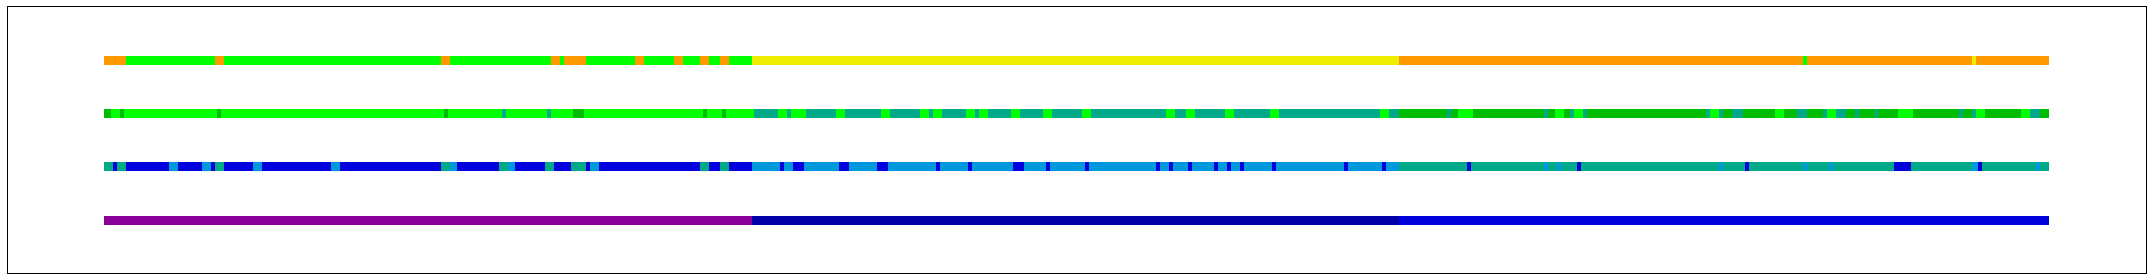

In [8]:
coords = np.array([i for i in range(len(data))])

fig = plt.figure(figsize=(30,4))
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])

s = 50
cc = cm.spectral(np.linspace(0.1, 0.2, len(n)))
for k in range(len(n)):
    idx = np.where(labels==k)[0]
    ax.scatter(coords[idx], [0]*len(idx), color=cc[k], s=s, marker='s')

cc = cm.spectral(np.linspace(0.2, 0.4, len(n)))
for k in range(len(n)):
    idx = np.where(J==k)[0]
    ax.scatter(coords[idx], [1]*len(idx), color=cc[k], s=s, marker='s')

cc = cm.spectral(np.linspace(0.4, 0.6, len(n)))
for k in range(len(n)):
    idx = np.where(JJ==k)[0]
    ax.scatter(coords[idx], [2]*len(idx), color=cc[k], s=s, marker='s')

cc = cm.spectral(np.linspace(0.6, 0.8, len(n)))
for k in range(len(n)):
    idx = np.where(JJJ==k)[0]
    ax.scatter(coords[idx], [3]*len(idx), color=cc[k], s=s, marker='s')
    
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(-1, 4)
fig.tight_layout()

In [9]:
print "Misclassification Error\n"
print "K-Medoids/Procrustes:", clusval.class_error(labels, J)
print "K-Means/Procrustes:", clusval.class_error(labels, JJ)
print "K-Means/Euclidean:", clusval.class_error(labels, JJJ)

Misclassification Error

K-Medoids/Procrustes: 0.176666666667
K-Means/Procrustes: 0.19
K-Means/Euclidean: 0.05


In [26]:
nr = range(10,50,10)
kmedoids_procrustes, kmeans_procrustes, kmeans_sklearn_eucl = clusval.MNIST_eval_procrustes(clusval.class_error, numbers=[2,3,8], nrange=nr)

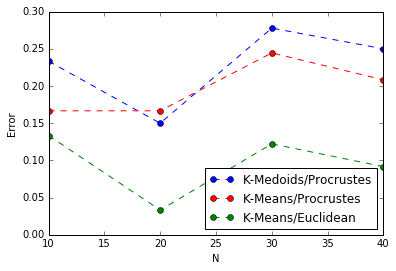

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(nr, kmedoids_procrustes, 'o--', color='blue', label='K-Medoids/Procrustes')
ax.plot(nr, kmeans_procrustes, 'o--', color='red', label='K-Means/Procrustes')
ax.plot(nr, kmeans_sklearn_eucl, 'o--', color='green', label='K-Means/Euclidean')
ax.set_xlabel('N')
ax.set_ylabel('Error')
ax.legend(loc=0)

In [29]:
nr = range(10,60,10)
kmedoids_procrustes, kmeans_procrustes, kmeans_sklearn_eucl = clusval.MNIST_eval_procrustes(clusval.class_error, numbers=[2,3,8], nrange=nr)

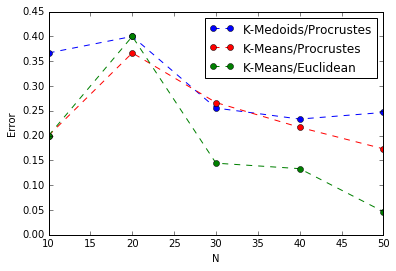

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(nr, kmedoids_procrustes, 'o--', color='blue', label='K-Medoids/Procrustes')
ax.plot(nr, kmeans_procrustes, 'o--', color='red', label='K-Means/Procrustes')
ax.plot(nr, kmeans_sklearn_eucl, 'o--', color='green', label='K-Means/Euclidean')
ax.set_xlabel('N')
ax.set_ylabel('Error')
ax.legend(loc=0)